# Pruebas de hipótesis para el modelo de regresión lineal múltiple

En esta sección suponemos que $\pmb{y}\sim N_n(\pmb{X}\pmb{\beta},\sigma^2\pmb{I})$ con $\pmb{X}$ $n\times(k+1)$ dimensional de rango $k+1<n$.

## Prueba de regresión general

Empezamos intereándonos en la hipótesis de que ninguno de los covariables $x$ considerados predicen a la variable de interés $y$ en el modelo de regresión lineal múltiple con errores normales. En términos matemáticos esto significa que $\pmb{\beta}_1=(\beta_1, \beta_2, \ldots , \beta_k )'=\pmb{0}$. Obtenemos la prueba de hipótesis:

\begin{equation*}
    H_0\, : \, \pmb{\beta}_1= \pmb{0} \;\;\;\;\; \text {v.s.} \;\;\;\;\; H_1\, : \, \pmb{\beta}_1 \neq \pmb{0} .
\end{equation*}

En las notas correspondientes a las distribuciones no centrales se demostró que para $\lambda_1 = \frac{\pmb{\beta}_1'\pmb{X}_c'\pmb{X}_c\pmb{\beta}_1}{2\sigma^2}$

\begin{equation*}
F = \frac{ SSR \, /\left( \sigma^2 k \right) }{ SSE \, /\left( \sigma^2(n-k-1) \right)  } 
= \frac{ SSR\, / k }{SSE\, / (n-k-1)}
\sim F(k,n-k-1,\lambda_1)
\end{equation*}
**Teorema** 

Si $H_0$ es cierta, es decir $\pmb{\beta}_1=\pmb{0}$, entonces $\lambda_1=0$ y $F \sim F(k,n-k-1) $; y si
$H_0$ es falsa, es decir $\pmb{\beta}_1\neq \pmb{0}$, entonces $\lambda_1=\frac{\pmb{\beta}_1'\pmb{X}_c'\pmb{X}_c\pmb{\beta}_1}{2\sigma^2}$ y $F \sim F(k,n-k-1,\lambda_1) $.

Observe que $\lambda_1 = 0$ si y sólo si $\pmb{\beta}_1=\pmb{0}$ dado que $\pmb{X}_c' \pmb{X}_c$ es positio definida. Podemos usar $F$ como cantida pivotal para realizar la prueba de hipótesis como sigue:

Si $F>F_{\alpha,k,n-k-1}$, con $F_{\alpha,k,n-k-1}$ tal que $\prob{F>F_{\alpha,k,n-k-1}|\pmb{\beta}_1=\pmb{0}}=\alpha$, entonces rechazamos $H_0$.

A continuación consideramos la prueba anterior para el caso i) en que $\pmb{\beta}_1=\pmb{0}$ y ajustamos un modelo con $\pmb{\beta}_1\neq \pmb{0}$; y para el caso ii) en que $\pmb{\beta}_1 \neq \pmb{0}$ y ajustamos un modelo con $\pmb{\beta}_1\neq \pmb{0}$.

In [2]:
using Distributions # Paquete con distribuciones de probabilidad
using Plots # Paquete para producir imágenes
using LaTeXStrings # Paquete para usar latex en strings

In [4]:
n = 100 # Consideramos 100 observaciones
x = rand(Uniform(),n) # n puntos aleatorios uniformes en (0,1), esta sería la primer columna de la matriz X arriba
X = zeros(n,3) # Matriz de ceros para construir X
for i in 1:n 
    X[i,:] = [ 1, x[i], x[i]^2 ] # iteramos para construir renglones de X
end

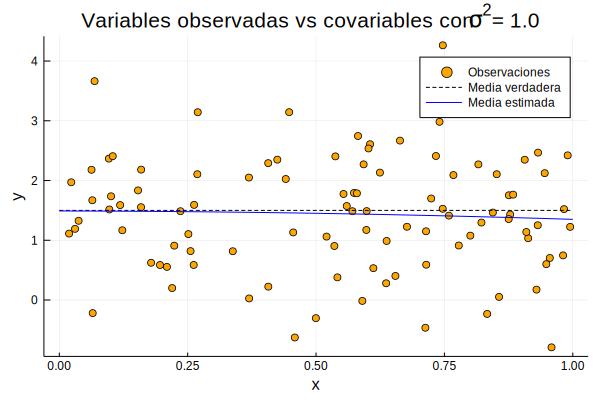

In [6]:
ϵ = rand(Normal(0,1.0),n) # Vector de errores normales con media μ=0 y varianza σ²=0.1
y = 1.5 .+ ϵ # Observaciones provenientes del modelo con varianza 0.1
β_ml = ( X' * X)^(-1) * X' * y
f(x) = 1.5
f_ml(x) = β_ml[1] + β_ml[2]*x + β_ml[3]*x^2.0
mesh = collect(0.0:1.0/100.0:1.0)
scatter(x,y,color="orange",label="Observaciones")
plot!(mesh,f.(mesh), color = :black, linestyle=:dash ,label="Media verdadera")
plot!(mesh,f_ml.(mesh), color = :blue, label="Media estimada")
ylabel!("y")
xlabel!("x")
title!("Variables observadas vs covariables con \\sigma^{2}  = 1.0")

Si calculamos el estadístico de prueba $F$

In [11]:
SSR = β_ml' * X' * y - n*mean(y)^2.0
SSE = y'*y - β_ml' * X' * y
F = (n-2-1)*SSR/( 2* SSE )
Fα = cquantile( FDist( 2, n-2-1), 0.05 );

3.0901866751548672

Vemos que 

In [14]:
F >= Fα

false

Por lo que no rechazamos $H_0 : \pmb{\beta}_1=\pmb{0}$.

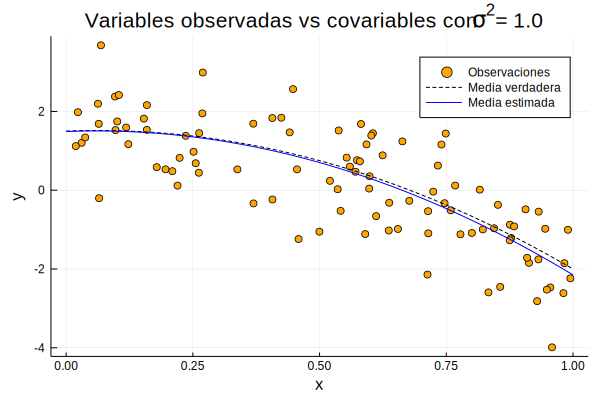

In [18]:
y = 1.5 .+ 0.5.*x .- 4.0.*x.^2.0 .+ ϵ # Observaciones provenientes del modelo con varianza 0.1
β_ml = ( X' * X)^(-1) * X' * y
f(x) = 1.5 + 0.5*x - 4.0.*x^2.0
f_ml(x) = β_ml[1] + β_ml[2]*x + β_ml[3]*x^2.0
mesh = collect(0.0:1.0/100.0:1.0)
scatter(x,y,color="orange",label="Observaciones")
plot!(mesh,f.(mesh), color = :black, linestyle=:dash ,label="Media verdadera")
plot!(mesh,f_ml.(mesh), color = :blue, label="Media estimada")
ylabel!("y")
xlabel!("x")
title!("Variables observadas vs covariables con \\sigma^{2}  = 1.0")

In [19]:
SSR = β_ml' * X' * y - n*mean(y)^2.0
SSE = y'*y - β_ml' * X' * y
F = (n-2-1)*SSR/( 2* SSE )
Fα = cquantile( FDist( 2, n-2-1), 0.05 );

Vemos que

In [20]:
F >= Fα

true

Por lo que rechazamos $H_0 : \pmb{\beta}_1=\pmb{0}$.

# Prueba para $H_0 : \pmb{C} \pmb{\beta} =\pmb{t}$.

Consideramos la prueba de hipótesis:

\begin{equation*}
    H_0\, : \, \pmb{C} \pmb{\beta} =\pmb{t} \;\;\;\;\; \text {v.s.} \;\;\;\;\; H_1\, : \, \pmb{C} \pmb{\beta} \neq \pmb{t} .
\end{equation*}

Está prueba al ser muy general nos será de gran utilidad para hacer pruebas de hipótesis en el modelo de regresión lineal múltiple. Por ejemplo, esta prueba nos permite hacer hipótesis de la forma $H_0 : \beta_1= \beta_2 + 5$. En lo siguiente suponemos que el sistema de equaciones $\pmb{C} \pmb{\beta} =\pmb{t}$ tiene por lo menos una solución, en $\beta$. Para plantear una prueba de hipótesis como en la sección anterior, ocupamos del siguiente teorema.

**Teorema** 

Si $\pmb{y}\sim N_n(\pmb{X}\pmb{\beta},\sigma^2 \pmb{I})$ y $\pmb{C}$ es $q\times(k+1)$ dimensional de rango $q\leq k+1$, entonces

1. $\pmb{C} \hat{\pmb{\beta}} - \pmb{t}\sim N_{q}(\pmb{C} \pmb{\beta} - \pmb{t},\sigma^2 \pmb{C}\left( \pmb{X}'\pmb{X}\right)^{-1}\pmb{C}')$.
2. $\frac{SSH}{\sigma^2} = \frac{(\pmb{C} \hat{\pmb{\beta}} - \pmb{t})'\left( \pmb{C}\left( \pmb{X}'\pmb{X}\right)^{-1}\pmb{C}' \right)^{-1} (\pmb{C} \hat{\pmb{\beta}} - \pmb{t})}{\sigma^2}\sim \chi^2(q, \lambda)$ con
$\lambda= \frac{(\pmb{C} \pmb{\beta} - \pmb{t})'\left( \pmb{C}\left( \pmb{X}'\pmb{X}\right)^{-1}\pmb{C}' \right)^{-1} (\pmb{C} \pmb{\beta} - \pmb{t})}{2\sigma^2}$
3. $SSH$ y $SSE= \pmb{y}'\left( \pmb{I}-\pmb{X}\left(\pmb{X}'\pmb{X} \right)^{-1}\pmb{X}'\right) \pmb{y}$ son indepednientes.

**dem**

1. Sabemos que en este caso $\hat{\pmb{\beta}}\sim N_{k+1}(\pmb{\beta},\sigma^2 \left( \pmb{X}'\pmb{X}\right)^{-1})$ por lo que, usando la distribución de $\pmb{A}\pmb{y}$ dado $\pmb{y}\sim N_n(\pmb{\mu},\pmb{\Sigma})$ vista en clase, $\pmb{C} \hat{\pmb{\beta}} - \pmb{t}\sim N_{q}(\pmb{C} \pmb{\beta} - \pmb{t},\sigma^2 \pmb{C}\left( \pmb{X}'\pmb{X}\right)^{-1}\pmb{C}')$.
2. Por un teorema visto en clase, vea notebook sobre distribuciones no centrales, basta ver que $\pmb{B}=\text{Cov}\left( \pmb{C} \hat{\pmb{\beta}} - \pmb{t} \right)\frac{1}{\sigma^2} \left( \pmb{C}\left( \pmb{X}'\pmb{X}\right)^{-1}\pmb{C}' \right)^{-1} $ es idempotente de rango $q$; pero vemos que $\pmb{B}=
\sigma^2 \pmb{C}\left( \pmb{X}'\pmb{X}\right)^{-1}\pmb{C}')\frac{1}{\sigma^2} \left( \pmb{C}\left( \pmb{X}'\pmb{X}\right)^{-1}\pmb{C}' \right)^{-1} =\pmb{I}_q$ es idempotente de rango $q$.
3. Sabemos que $\frac{SSE}{\sigma^2}\sim \chi^2 (n-k-1)$ es independiente de $\hat{\pmb{\beta}}$, de lo que se sigue que $\pmb{C} \hat{\pmb{\beta}} - \pmb{t}$ es independiente de $SSE$ y por lo tanto $SSH$ es indepedniente de $SSE$.

Del teorema anterior se sigue que para $\lambda = (\pmb{C} \pmb{\beta} - \pmb{t})'\left( \pmb{C}\left( \pmb{X}'\pmb{X}\right)^{-1}\pmb{C}' \right)^{-1} (\pmb{C} \pmb{\beta} - \pmb{t})/2\sigma^2 $

\begin{equation*}
F = \frac{ SSH \, /\left( \sigma^2 q \right) }{ SSE \, /\left( \sigma^2(n-k-1) \right)  } 
= \frac{ SSH\, / q }{SSE\, / (n-k-1)}
\sim F(q,n-k-1,\lambda)
\end{equation*}

**Teorema** 

Si $H_0$ es cierta, es decir $\pmb{C} \pmb{\beta} =\pmb{t}$, entonces $\lambda = 0$ y $F \sim F(q,n-k-1) $; y si
$H_0$ es falsa, es decir $\pmb{C} \pmb{\beta} \neq \pmb{t}$, entonces $\lambda=\frac{(\pmb{C} \pmb{\beta} - \pmb{t})'\left( \pmb{C}\left( \pmb{X}'\pmb{X}\right)^{-1}\pmb{C}' \right)^{-1} (\pmb{C} \pmb{\beta} - \pmb{t})}{2\sigma^2}$ y $F \sim F(q,n-k-1,\lambda) $.

Podemos usar $F$ como cantidad pivotal para realizar la prueba de hipótesis como sigue:

Si $F>F_{\alpha,q,n-k-1}$, con $F_{\alpha,q,n-k-1}$ tal que $\prob{F>F_{\alpha,q,n-k-1}|H_0}=\alpha$, entonces rechazamos $H_0$.

Si queremos realizar una prueba de hipótesis del estilo 
\begin{equation*}
H_0\, : \, \pmb{a}' \pmb{\beta} =0 \;\;\;\;\; \text {v.s.} \;\;\;\;\; H_1\, : \, \pmb{a}' \pmb{\beta} \neq 0 
\end{equation*}
entonces tenemos el estadístico de prueba
\begin{align*}
F=\frac{ \left( \pmb{a}'\hat{\pmb{\beta}} \right)' \left(\pmb{a}'\left( \pmb{X}'\pmb{X} \right)^{-1} \pmb{a}  \right)^{-1} \pmb{a}'\hat{\pmb{\beta}}}{s^2}
= \frac{ \left( \pmb{a}'\hat{\pmb{\beta}} \right)^2 }{s^2 \pmb{a}'\left( \pmb{X}'\pmb{X} \right)^{-1} \pmb{a}}
&\sim F\left(1,n-k-1, \pmb{\beta}'\pmb{a}  \left(\pmb{a}'\left( \pmb{X}'\pmb{X} \right)^{-1} \pmb{a}  \right)^{-1} \pmb{a}'\pmb{\beta}/2\sigma^2  \right)
\\
& \sim F\left(1,n-k-1, \frac{ \left( \pmb{a}'\pmb{\beta} \right)^2 }{2\sigma^2 \pmb{a}'\left( \pmb{X}'\pmb{X} \right)^{-1} \pmb{a}}  \right)
\end{align*}
donde $s^2=SSE/(n-k-1)$.

Para realizar la prueba $H_0\, : \, \beta_j = 0 \;\;\;\;\; \text {v.s.} \;\;\;\;\; H_1\, : \, \beta_j \neq 0 $ tomamos $\pmb{a}'=(0,\ldots,0,1,0,\ldots, 0  )=\pmb{e}_j$ arriba para obtener el estadístico de prueba
\begin{equation*}
F=\frac{ \hat{\beta}_j^2 }{s^2 g_{j,j}}
\sim F\left( 1, n-k-1, \frac{ \beta_j^2 }{2\sigma^2g_{j,j}} \right)
\end{equation*}
con $g_{j,j}$ el j-ésimo elemento diagonal de $\left( \pmb{X}'\pmb{X} \right)^{-1}$. Rechazamos $H_0\, : \, \beta_j = 0$ si $F\geq F_{\alpha,1, n-k-1}$.

Equivalentemente, al tener nuestro estadístico de prueba $F$ con $1$ y $n-k-1$ grados de libertad, podemos utilizar
\begin{equation*}
t_j = \frac{\hat{\beta}_j}{s\sqrt{g_{j,j}}}\sim t\left(n-k-1,\frac{ \beta_j}{2\sigma^2g_{j,j}}\right),
\end{equation*}

donde hemos usado el teorema ante-anterior para estandarizar a $\hat{\beta}_j$.

Rechazamos $H_0\, : \, \beta_j = 0$ si $|t_j|\geq t_{\alpha /2, n-k-1}$.